#Name: Mann Dsylva
#Roll no: 24MAI009

#Practical 7 : Autoencoder

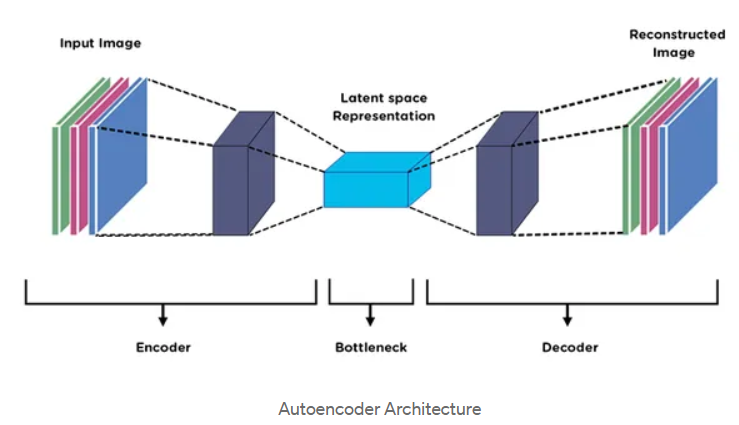

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3467 - val_loss: 0.1638
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1533 - val_loss: 0.1275
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1232 - val_loss: 0.1087
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1068 - val_loss: 0.0975
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0965 - val_loss: 0.0903
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0898 - val_loss: 0.0852
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0851 - val_loss: 0.0816
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0816 - val_loss: 0.0791
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0795 - val_loss: 0.0774
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0779 - val_loss: 0.0763
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0767 - val_loss: 0.0755
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

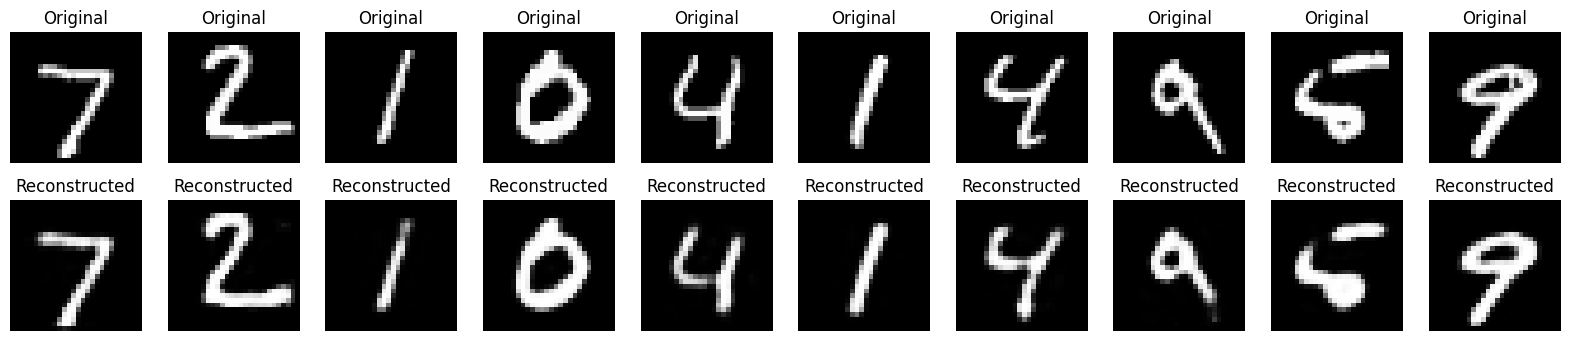

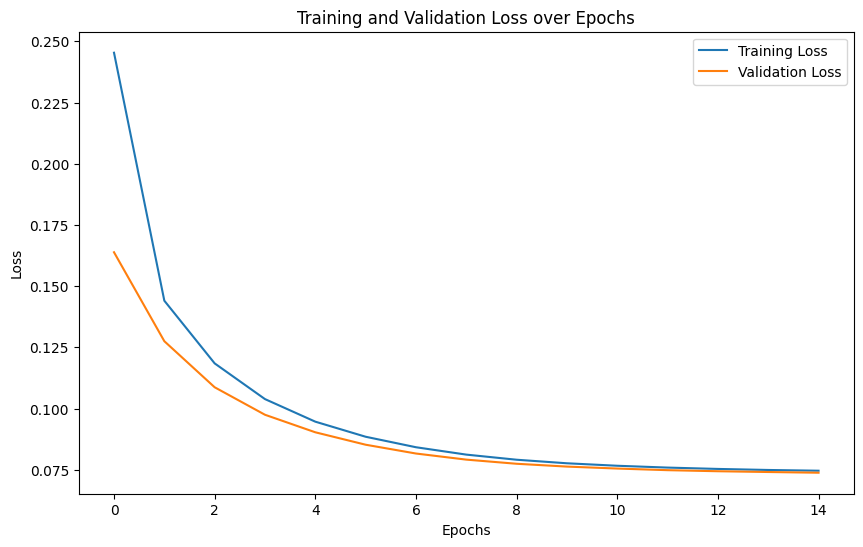

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Loading the dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Parameters
input_dim = x_train.shape[1]  # 28x28 pixels flattened

# Autoencoder structure
encoding_dim = 64  # Size of the latent space (hidden)

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_img)
decoded = Dense(input_dim, activation="sigmoid")(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Training
history=autoencoder.fit(
    x_train, x_train,
    epochs=15,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test))

# Encode and decode some test images
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display the original and reconstructed images
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()